In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb

plt.rcParams['figure.figsize'] = 8, 4

In [6]:
df = pd.read_json(open('nobel_winners_cleaned.json'))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        858 non-null    object
 1   country         858 non-null    object
 2   date_of_birth   858 non-null    object
 3   date_of_death   559 non-null    object
 4   gender          858 non-null    object
 5   link            858 non-null    object
 6   name            858 non-null    object
 7   place_of_birth  831 non-null    object
 8   place_of_death  524 non-null    object
 9   text            858 non-null    object
 10  year            858 non-null    int64 
 11  award_age       858 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 80.6+ KB


In [8]:
# convert the date columns to a usable form
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   category        858 non-null    object             
 1   country         858 non-null    object             
 2   date_of_birth   858 non-null    datetime64[ns, UTC]
 3   date_of_death   559 non-null    datetime64[ns, UTC]
 4   gender          858 non-null    object             
 5   link            858 non-null    object             
 6   name            858 non-null    object             
 7   place_of_birth  831 non-null    object             
 8   place_of_death  524 non-null    object             
 9   text            858 non-null    object             
 10  year            858 non-null    int64              
 11  award_age       858 non-null    int64              
dtypes: datetime64[ns, UTC](2), int64(2), object(8)
memory usage: 80.6+ KB


In [10]:
df.head()

,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,award_age
0,Physiology or Medicine,Argentina,1927-10-08 00:00:00+00:00,2002-03-24 00:00:00+00:00,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,57
1,Peace,Belgium,1829-07-26 00:00:00+00:00,1912-10-06 00:00:00+00:00,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909,80
2,Literature,Belgium,1862-08-29 00:00:00+00:00,1949-05-06 00:00:00+00:00,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911,49
3,Peace,Belgium,1854-04-22 00:00:00+00:00,1943-05-14 00:00:00+00:00,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913,59
4,Physiology or Medicine,Belgium,1870-06-13 00:00:00+00:00,1961-04-06 00:00:00+00:00,male,http://en.wikipedia.org/wiki/Jules_Bordet,Jules Bordet,"Soignies, Belgium",None,"Jules Bordet , Physiology or Medicine, 1919",1919,49


In [13]:
by_gender = df.groupby('gender')

<AxesSubplot:xlabel='gender'>

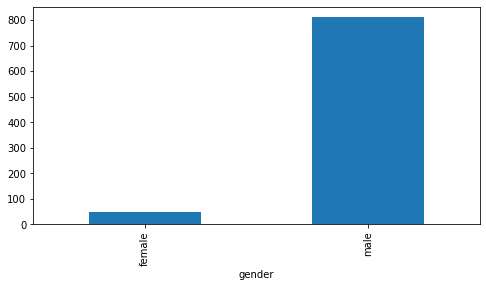

In [14]:
by_gender.size().plot(kind='bar')

In [15]:
by_category = df.groupby('category')

<AxesSubplot:ylabel='category'>

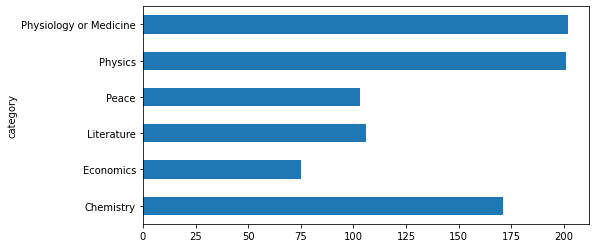

In [16]:
by_category.size().plot(kind='barh')

In [10]:
by_gender.size()

gender
female     47
male      811
dtype: int64

In [2]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

NameError: name 'df' is not defined

In [12]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

<AxesSubplot:ylabel='category,gender'>

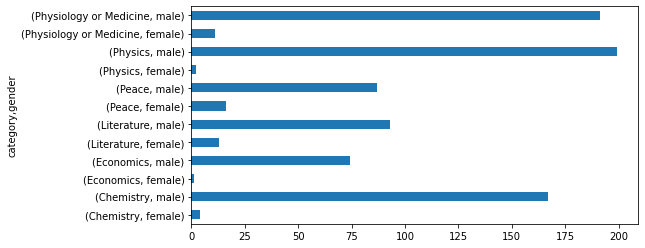

In [13]:
by_cat_gen.size().plot(kind='barh')

<AxesSubplot:ylabel='category'>

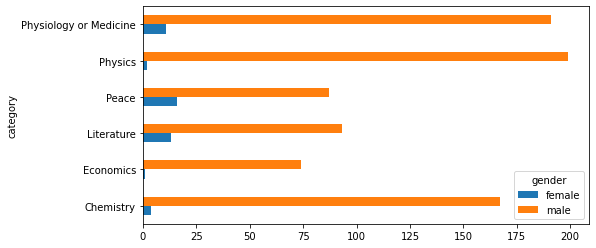

In [14]:
by_cat_gen.size().unstack().plot(kind='barh')

<AxesSubplot:ylabel='category'>

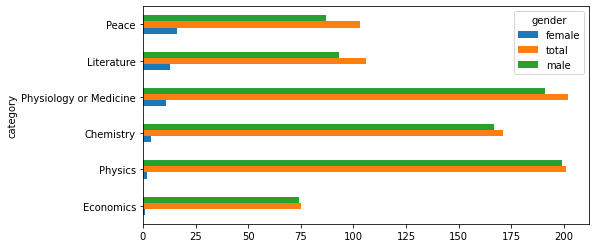

In [15]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

In [16]:
df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

,name,country,year
267,Maria Goeppert-Mayer,United States,1963
614,Marie Skłodowska-Curie,Poland,1903


<AxesSubplot:xlabel='year'>

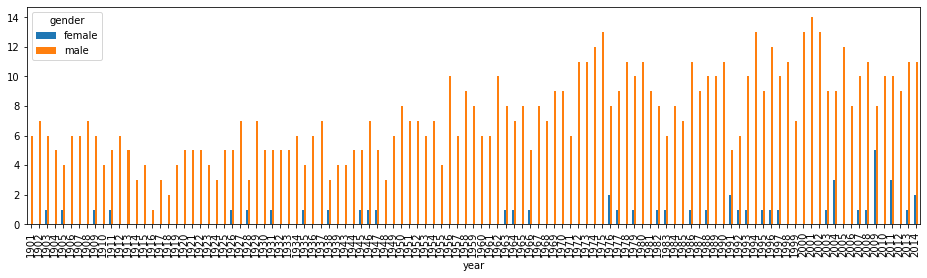

In [17]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

In [18]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [19]:
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
...,...,...
2010,NaN,10.0
2011,3.0,10.0
2012,NaN,9.0


Text(0.5, 0, 'Year')

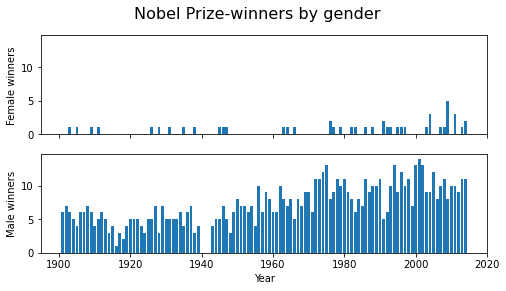

In [20]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

<AxesSubplot:xlabel='country'>

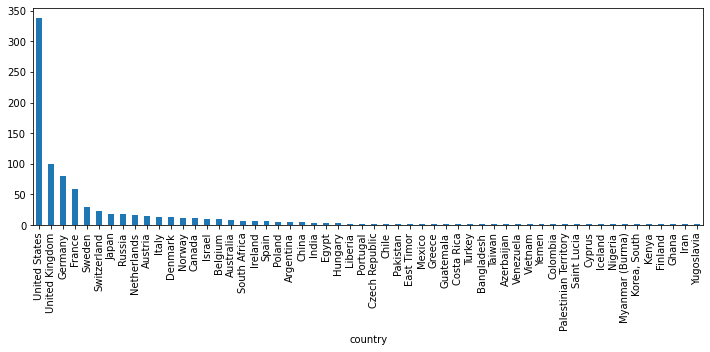

In [21]:
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))

In [22]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Cyprus', 'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Korea, South', 'Liberia', 'Mexico', 'Myanmar (Burma)',
       'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestinian Territory',
       'Poland', 'Portugal', 'Russia', 'Saint Lucia', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom',
       'United States', 'Venezuela', 'Vietnam', 'Yemen', 'Yugoslavia'],
      dtype='object', name='country')

In [25]:
df_countries = pd.read_json('winning_country_data.json', orient='index')

In [27]:
df_countries.iloc[0]

gini                  39.0
name                Turkey
alpha3Code             TUR
area              783562.0
latlng        [39.0, 35.0]
capital             Ankara
population        76667864
Name: Turkey, dtype: object

In [28]:
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] =\
df_countries.nobel_wins / df_countries.population

<AxesSubplot:xlabel='name'>

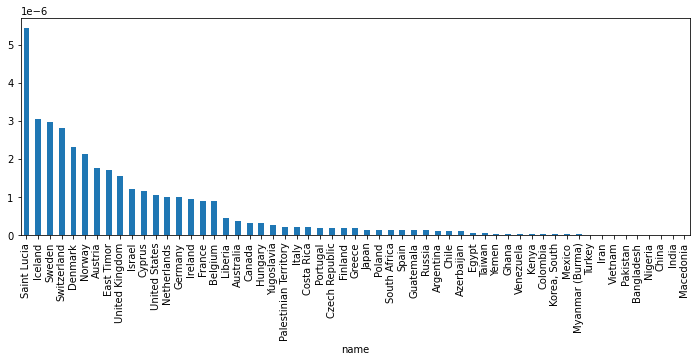

In [29]:
df_countries.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar', figsize=(12,4))

<AxesSubplot:xlabel='name'>

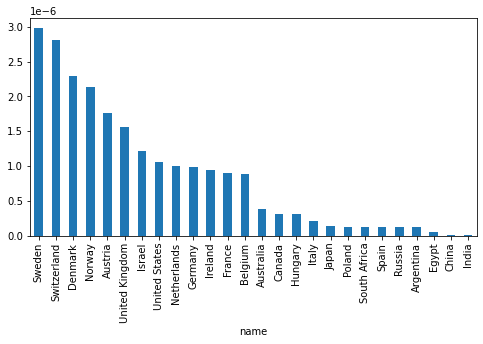

In [30]:
# filter for countries with more than two Nobel prizes
df_countries[df_countries.nobel_wins > 2]\
.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar')

In [31]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
nat_cat_sz[:5] # take the first five countries by category

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,2.0
Australia,NaN,1.0,1.0,NaN,1.0,6.0
Austria,3.0,1.0,1.0,2.0,4.0,4.0
Azerbaijan,NaN,NaN,NaN,NaN,1.0,NaN
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN


0.0
0.5
1.0
1.5
2.0
2.5


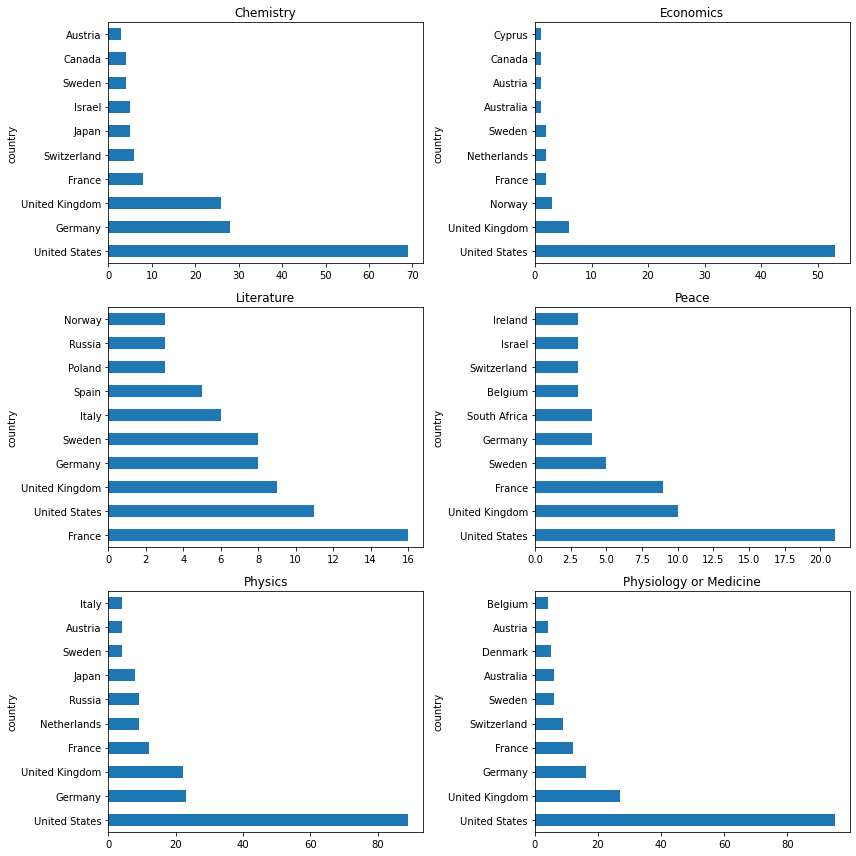

In [34]:
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
    #print(i/COL_NUM)
    ax = axes[int(i/COL_NUM), int(i%COL_NUM)]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
plt.tight_layout()

In [35]:
# increase the font size 
plt.rcParams['font.size'] = 20

In [36]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index)

<AxesSubplot:xlabel='year'>

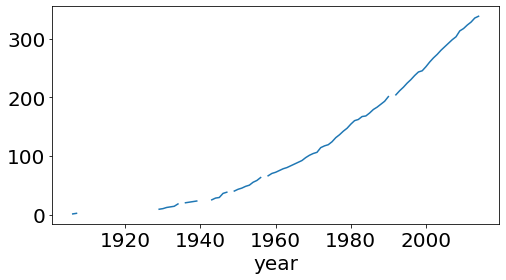

In [37]:
by_year_nat_sz['United States'].cumsum().plot()

<AxesSubplot:xlabel='year'>

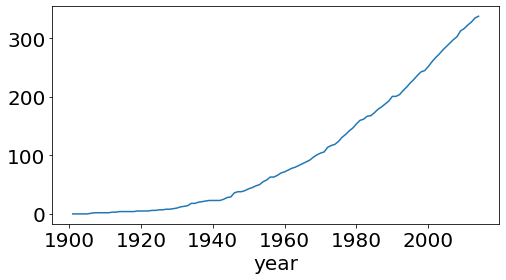

In [38]:
by_year_nat_sz['United States'].fillna(0).cumsum().plot()

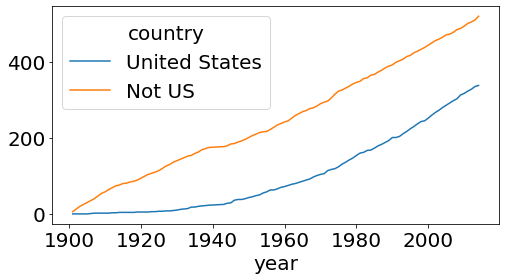

In [39]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')
by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[['United States', 'Not US']].cumsum().plot()

<AxesSubplot:xlabel='year'>

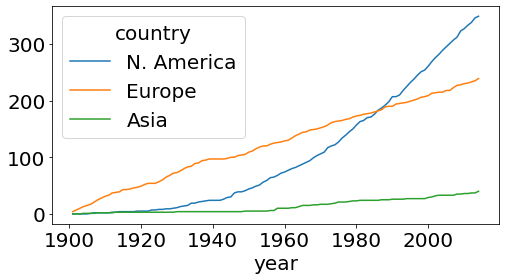

In [40]:
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index).fillna(0)

regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia', 'India']}
]

for region in regions:
    by_year_nat_sz[region['label']] =\
    by_year_nat_sz[region['countries']].sum(axis=1)
    
by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot()

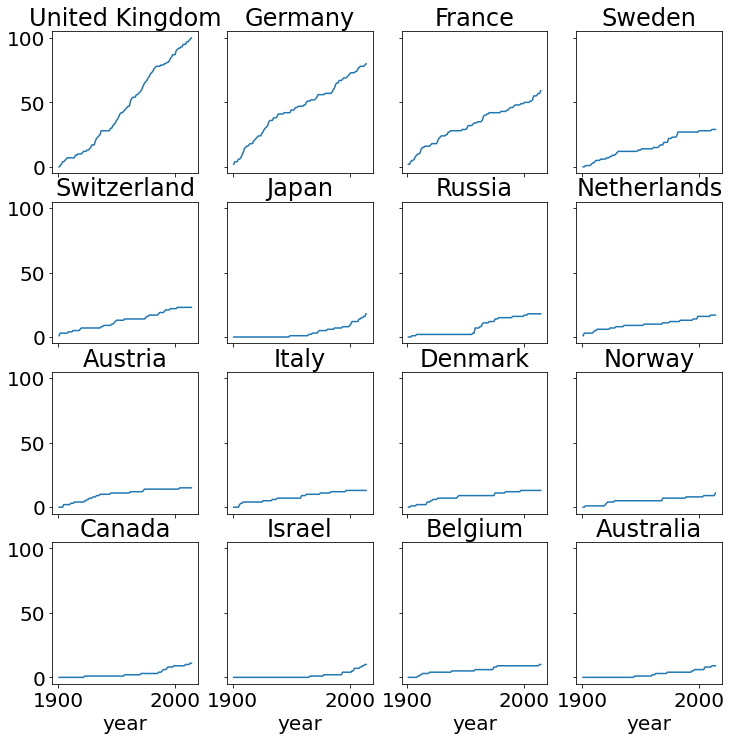

In [42]:
COL_NUM = 4 
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)
fig, axes = plt.subplots(COL_NUM, ROW_NUM,\
sharex=True, sharey=True,
figsize=(12,12))
for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[int(i/COL_NUM), int(i%ROW_NUM)]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

In [43]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='country'>

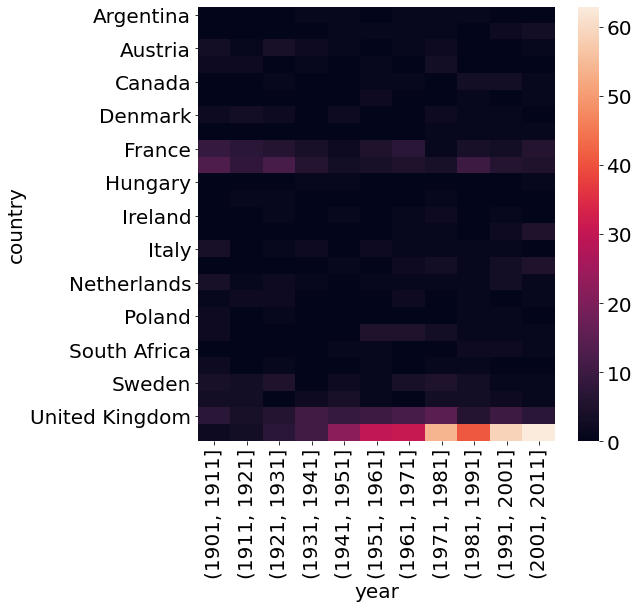

In [44]:
bins = np.arange(df.year.min(), df.year.max(), 10)
by_year_nat_binned = df.groupby(
['country', pd.cut(df.year, bins, precision=0)]).size().unstack().fillna(0)
plt.figure(figsize=(8,8))
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2])

<AxesSubplot:>

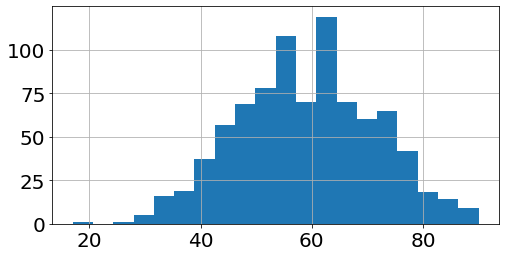

In [45]:
df['award_age'].hist(bins=20)

C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='award_age', ylabel='Density'>

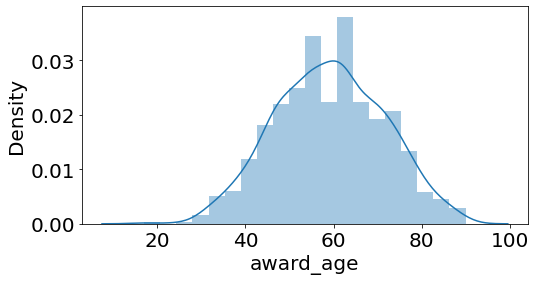

In [46]:
sns.distplot(df['award_age'])

C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='award_age'>

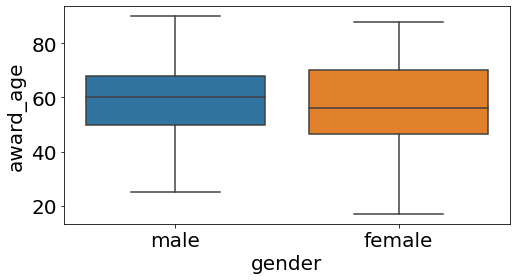

In [47]:
sns.boxplot(df.gender, df.award_age)

C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='award_age'>

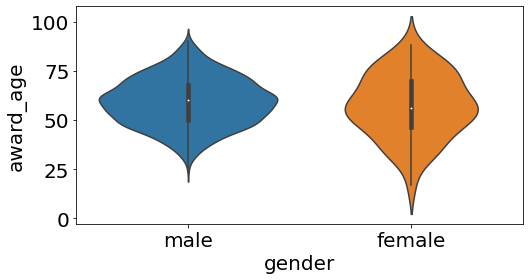

In [48]:
sns.violinplot(df.gender, df.award_age)

In [49]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth)\
.dt.days/365

C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_at_death', ylabel='Density'>

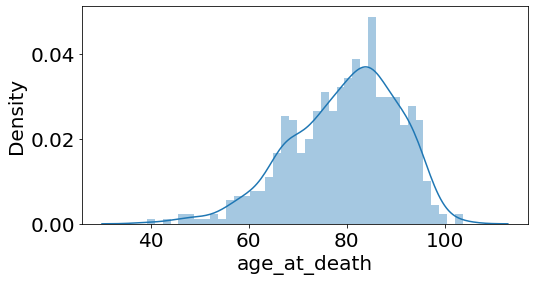

In [50]:
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

In [51]:
df[df.age_at_death > 100][['name', 'category', 'year']]

,name,category,year
101,Ronald Coase,Economics,1991
329,Rita Levi-Montalcini,Physiology or Medicine,1986


In [52]:
df_temp = df[df.age_at_death.notnull()]

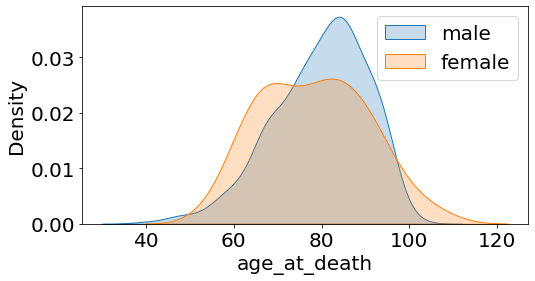

In [53]:
sns.kdeplot(df_temp[(df_temp.gender == 'male')].age_at_death, shade=True, label='male')
sns.kdeplot(df_temp[(df_temp.gender == 'female')].age_at_death, shade=True, label='female')
plt.legend()

C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='age_at_death'>

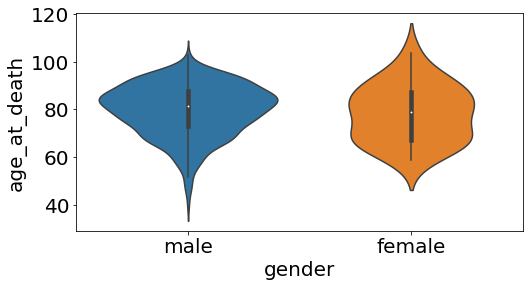

In [54]:
sns.violinplot(df.gender, age_at_death)

C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ShihYuChang\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


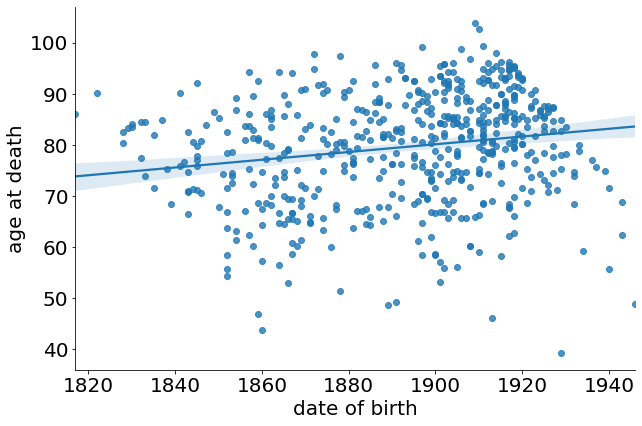

In [55]:
df_temp=df[df.age_at_death.notnull()]
data = pd.DataFrame(
{'age at death':df_temp.age_at_death,
'date of birth':df_temp.date_of_birth.dt.year})
sns.lmplot('date of birth', 'age at death', data, size=6, aspect=1.5)

In [57]:
df = pd.read_json('nobel_winners_plus_bornin.json', orient='records')

Text(0.5, 1.0, 'The Nobel Diaspora')

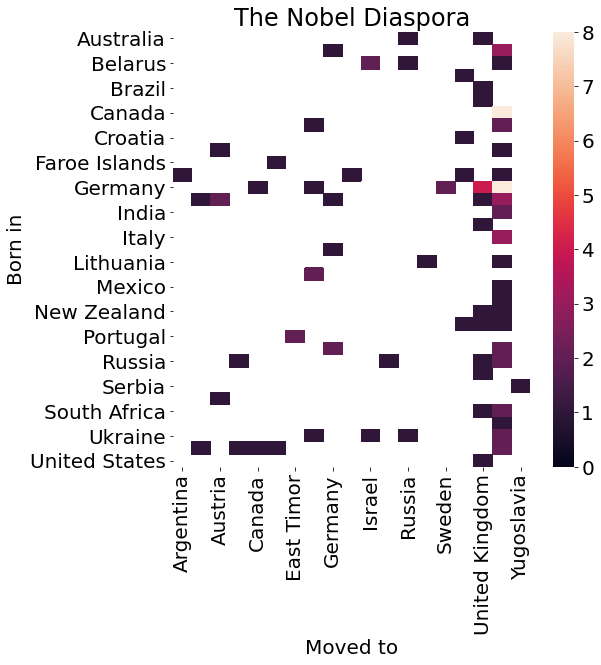

In [58]:
by_bornin_nat = df[df.born_in.notnull()].groupby(\
['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(8,8))
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8)
ax.set_title('The Nobel Diaspora')

In [59]:
df.date_of_birth = pd.to_datetime(df.date_of_birth).dt.date

In [60]:
df[(df.born_in == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category']]

,name,date_of_birth,category
119,Ernst Boris Chain,1906-06-19,Physiology or Medicine
484,Hans Adolf Krebs,1900-08-25,Physiology or Medicine
486,Max Born,1882-12-11,Physics
503,Bernard Katz,1911-03-26,Physiology or Medicine
